# Wavelength Loss Profile

Here for the N1 configuration of Bragg Fiber.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

# Initialize

In [3]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [4]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]

ts = [4.0775e-05, 1e-5, 4.0775e-05]

mats = ['air', 'glass', 'air']

maxhs = [1, 1, 1]

# Four Layer Study: Glass outside Air (Outside Cladding)

In [5]:
betas1 = np.zeros_like(wls, dtype=complex)

for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=maxhs, wl=wl, mats=mats, ns=ns, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess-1e-5j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.9999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .9999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (224.44266417866774-1.5514804123985976e-05j) . Residual of determinant:  8.846710779784738e-12 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (224.12239065688624-1.3541785752874707e-05j) . Residual of determinant:  2.3277292791528353e-11 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (223.80303482911893-1.2030909236403956e-05j) . Residual of determinant:  2.8425866023507927e-11 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (223.48459154608008-1.0856409740448282e-05j) . Residual of determinant:  2.4954223703834083e-11 


  

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (214.33503864691156-7.403610109424808e-05j) . Residual of determinant:  2.3334561992004523e-12 


     --------------------  35/301: wavelength: 1.468e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (214.04274079733247-0.00010951664160844014j) . Residual of determinant:  6.095844369602556e-12 


     --------------------  36/301: wavelength: 1.47e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (213.75111743404702-0.0001787349565106181j) . Residual of determinant:  6.1633045085047536e-12 


     --------------------  37/301: wavelength: 1.4719999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (213.46003937025512-0.0003410231663345392j) . Residual of determinant:  3.213281872083474e-13 


     --------------------  38/301: wavelength: 1.474e-06  ----------

Scaled beta:  (205.90709059105978-9.019347653849921e-06j) . Residual of determinant:  5.151994668638806e-11 


     --------------------  65/301: wavelength: 1.528e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.63750242102103-8.926021905828435e-06j) . Residual of determinant:  5.393080462908028e-11 


     --------------------  66/301: wavelength: 1.53e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (205.36861912349846-8.889331664384681e-06j) . Residual of determinant:  2.1151194194825603e-10 


     --------------------  67/301: wavelength: 1.532e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.10043780667976-8.907701564953892e-06j) . Residual of determinant:  6.388677349930704e-11 


     --------------------  68/301: wavelength: 1.5339999999999998e-06  --------------------     

Boundary names not provided, using d

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
Scaled beta:  (197.86134221826939-0.0017231760249234744j) . Residual of determinant:  7.385782400681157e-14 


     --------------------  96/301: wavelength: 1.59e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
Scaled beta:  (197.6089398353556-0.0069687602009584175j) . Residual of determinant:  2.6372601837852857e-14 


     ---------

scaling guess: 1
scaling guess: 2
Scaled beta:  (191.5910899528347-1.2256063113027909e-05j) . Residual of determinant:  6.881674657878785e-11 


     --------------------  122/301: wavelength: 1.642e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (191.35764904943628-1.1924387952605231e-05j) . Residual of determinant:  1.5774899506841212e-11 


     --------------------  123/301: wavelength: 1.6439999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (191.12477661399114-1.1661191897738213e-05j) . Residual of determinant:  4.508155362718935e-11 


     --------------------  124/301: wavelength: 1.646e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (190.89247044881108-1.1460396690744923e-05

Scaled beta:  (184.39227290568175-7.362958284225312e-05j) . Residual of determinant:  9.93913667836233e-12 


     --------------------  154/301: wavelength: 1.7059999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (184.17591099451684-9.129436623354984e-05j) . Residual of determinant:  6.915822328046018e-12 


     --------------------  155/301: wavelength: 1.708e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (183.96002230003256-0.00011645931541608247j) . Residual of determinant:  2.813712193077428e-13 


     --------------------  156/301: wavelength: 1.71e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (183.74459067211464-0.00015396640810521117j) . Residual of determinant:  7.05074718555533e-13 


     --------------------  157/301: wavelength: 1.7119999999999999e-06  --------------------     

Bou

scaling guess: 1
scaling guess: 2
Scaled beta:  (179.75143687943807-4.93782244051031e-05j) . Residual of determinant:  3.1583542492884306e-12 


     --------------------  176/301: wavelength: 1.7499999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (179.54588013622532-4.33476333546324e-05j) . Residual of determinant:  1.10641245611204e-11 


     --------------------  177/301: wavelength: 1.752e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (179.3408012746112-3.851191687712981e-05j) . Residual of determinant:  4.352979583229731e-12 


     --------------------  178/301: wavelength: 1.7539999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (179.13619696800205-3.457925784395527e-05j) . Residual of determinant:  1.5265112351245298e-11 


     --------------------  179/301: wavelength: 1.7559999999999998e-06  ------------------

Scaled beta:  (173.20866062550502-1.6455438044348794e-05j) . Residual of determinant:  3.971583159151709e-11 


     --------------------  209/301: wavelength: 1.8159999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (173.01782293826068-1.6983339048293547e-05j) . Residual of determinant:  3.54557016992118e-11 


     --------------------  210/301: wavelength: 1.8179999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (172.8274042743598-1.7589311525406173e-05j) . Residual of determinant:  1.9944663521706358e-11 


     --------------------  211/301: wavelength: 1.82e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (172.63740314061968-1.8282092975977407e-05j) . Residual of determinant:  2.743405330600346e-11 


     --------------------  212/301: wavelength: 1.8219999999999999e-06  --------------------     

Boundary names not pr

Scaled beta:  (167.6568458812886-0.0013488974144139016j) . Residual of determinant:  1.3995735329358498e-13 


     --------------------  239/301: wavelength: 1.876e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (167.47637923079864-0.0026603513463351698j) . Residual of determinant:  5.250108066354868e-14 


     --------------------  240/301: wavelength: 1.8779999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (167.29541869712403-0.006250749896773203j) . Residual of determinant:  1.5597875717682388e-14 


     --------------------  241/301: wavelength: 1.8799999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling g

scaling guess: 1
scaling guess: 2
Scaled beta:  (163.3036661328763-3.3972911426764857e-05j) . Residual of determinant:  5.720091407940392e-12 


     --------------------  264/301: wavelength: 1.926e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (163.1339952866509-3.193105911097562e-05j) . Residual of determinant:  6.958899400105523e-12 


     --------------------  265/301: wavelength: 1.928e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (162.96467866027723-3.014853054636047e-05j) . Residual of determinant:  9.05533426413086e-12 


     --------------------  266/301: wavelength: 1.9299999999999997e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (162.79571486158605-2.858694808353116e-05j) . Residual of determinant:  2.9043739888556763e-13 


     --------------------  267/301: wavelength: 1.9

scaling guess: 1
Scaled beta:  (157.88498145144789-2.2160896118795743e-05j) . Residual of determinant:  4.512184932591512e-12 


     --------------------  297/301: wavelength: 1.9919999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (157.72638262152472-2.279872758348997e-05j) . Residual of determinant:  1.3786838745032204e-12 


     --------------------  298/301: wavelength: 1.994e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (157.56810116565896-2.351216123118909e-05j) . Residual of determinant:  3.973544484077308e-11 


     --------------------  299/301: wavelength: 1.996e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (157.41013604871452-2.4308428972138893e-05j) . Residual of determinant:  1.4861950252782294e-11 


     --------------------  300/301: wavelength: 1.9979999999999

In [6]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

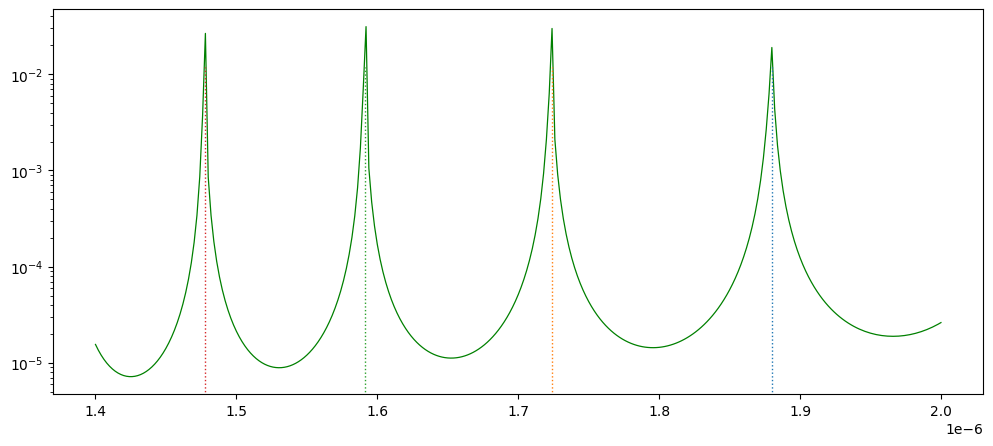

In [7]:
%matplotlib inline
plt.figure(figsize=(12,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in Ls:
    plt.plot([l,l], [0, .012],  linewidth=1, linestyle=':')

In [8]:
# np.save('../../Air_Buffer_Thickness_Studies/N2_studies/data/N1_wls.npy', betas1)

# Using Sellmeier

In [35]:
betas2=np.zeros_like(betas1)
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=[1 ,1, 1], wl=wl, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .9999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (224.38053110813001-1.918158156653316e-05j) . Residual of determinant:  2.713308689581751e-11 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (224.0603364609137-1.6298771167142448e-05j) . Residual of determinant:  7.280703736586442e-11 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (223.74106166961238-1.4148667815533754e-05j) . Residual of determinant:  2.8065457479554698e-11 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.

Scaled beta:  (215.15687684908173-2.4601382604729034e-05j) . Residual of determinant:  2.3783447555215848e-11 


     --------------------  32/301: wavelength: 1.462e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (214.86241535797296-2.9954304640511397e-05j) . Residual of determinant:  6.8411174085074415e-12 


     --------------------  33/301: wavelength: 1.4639999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (214.56874172288363-3.7508819786723837e-05j) . Residual of determinant:  1.2356041712157076e-11 


     --------------------  34/301: wavelength: 1.466e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (214.27584562184745-4.8630417509761166e-05j) . Residual of determinant:  1.60086728244068e-11 


     --------------------  35/301: wavelength: 1.468e-06  --------------------     

Boundary names not provided, u

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (208.30789750759942-1.5673504775111714e-05j) . Residual of determinant:  3.603367351062124e-12 


     --------------------  56/301: wavelength: 1.51e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (208.03190207101832-1.4249656094926279e-05j) . Residual of determinant:  2.615209809617246e-11 


     --------------------  57/301: wavelength: 1.5119999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (207.75663985383628-1.3100159305991814e-05j) . Residual of determinant:  1.6318795511260214e-11 


     --------------------  58/301: wavelength: 1.5139999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (207.4821073412301-1.216604479863215e-05j) . Residual of determina

Scaled beta:  (200.07916143873865-2.9170930974587057e-05j) . Residual of determinant:  4.895535294373835e-12 


     --------------------  87/301: wavelength: 1.572e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (199.82448299593733-3.4340322382125525e-05j) . Residual of determinant:  2.7133060453218268e-11 


     --------------------  88/301: wavelength: 1.5739999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (199.57043918241365-4.121178878154177e-05j) . Residual of determinant:  7.385484631817466e-12 


     --------------------  89/301: wavelength: 1.5759999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (199.31702337304486-5.06036237288899e-05j) . Residual of determinant:  6.09014509386431e-12 


     --------------------  90/301: wavelength: 1.578e-06  --------------------     

Boundary names not pro

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (192.71352106346114-1.698802209659642e-05j) . Residual of determinant:  3.764641330959405e-12 


     --------------------  117/301: wavelength: 1.6319999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (192.47726627876173-1.588153426887579e-05j) . Residual of determinant:  6.225550908445489e-12 


     --------------------  118/301: wavelength: 1.634e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (192.24159173983838-1.495443280039197e-05j) . Residual of determinant:  1.4393150114158435e-11 


     --------------------  119/301: wavelength: 1.6359999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (192.00649499420064-1.417637468

scaling guess: 1
Scaled beta:  (185.86923926790473-2.2959816337621062e-05j) . Residual of determinant:  2.126413643398679e-11 


     --------------------  147/301: wavelength: 1.6919999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (185.6494374797722-2.5244890549472345e-05j) . Residual of determinant:  1.570062626643653e-12 


     --------------------  148/301: wavelength: 1.6939999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (185.43015036136887-2.7992611291357027e-05j) . Residual of determinant:  2.788432968801074e-11 


     --------------------  149/301: wavelength: 1.696e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (185.21137523036154-3.1328643958522095e-05j) . Residual of determinant:  1.161207904256445e-11 


     --------------------  150/301

Scaled beta:  (179.9077673069759-7.48624622857621e-05j) . Residual of determinant:  7.98727964107508e-12 


     --------------------  175/301: wavelength: 1.7479999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (179.70176046223872-6.311533047783167e-05j) . Residual of determinant:  3.236557076555299e-12 


     --------------------  176/301: wavelength: 1.7499999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (179.4962410384054-5.4152095722397246e-05j) . Residual of determinant:  3.1914084536294407e-12 


     --------------------  177/301: wavelength: 1.752e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (179.29120350780119-4.716191946084914e-05j) . Residual of determinant:  1.9359683050354186e-11 


     --------------------  178/301: wavelength: 1.75399

scaling guess: 1
scaling guess: 2
Scaled beta:  (173.73557031553938-1.4924603146705191e-05j) . Residual of determinant:  3.271824672216022e-11 


     --------------------  206/301: wavelength: 1.8099999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (173.54352041736126-1.5166628276114184e-05j) . Residual of determinant:  4.059536302655156e-11 


     --------------------  207/301: wavelength: 1.8119999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (173.35189401775813-1.5462349235028285e-05j) . Residual of determinant:  9.706443708237443e-12 


     --------------------  208/301: wavelength: 1.814e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (173.1606896390254-1.5815225309344597e-05j) . Residual of determinant:  1.469736447988771e-11 


     ------------

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (167.9715343803558-0.00028249049694650813j) . Residual of determinant:  7.632061049956679e-13 


     --------------------  237/301: wavelength: 1.8719999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (167.79162742740493-0.0003899946787089657j) . Residual of determinant:  7.308394375808611e-13 


     --------------------  238/301: wavelength: 1.8739999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
Scaled beta:  (167.6119565742932-0.0005706726366683887j) . Residual of determinant:  7.439732155161757e-13 


     -------------------- 

scaling guess: 2
Scaled beta:  (163.08884912897003-3.596726233572562e-05j) . Residual of determinant:  1.5305982630128313e-11 


     --------------------  265/301: wavelength: 1.928e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (162.9195749186275-3.368301928675309e-05j) . Residual of determinant:  6.645836199603976e-13 


     --------------------  266/301: wavelength: 1.9299999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (162.75065400611624-3.169474146371627e-05j) . Residual of determinant:  1.3075670419748061e-11 


     --------------------  267/301: wavelength: 1.932e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (162.5820849633521-2.995711351522614e-05j) . Residual of determinant:  5.4654600317737655e-12 


     --------------------  268/301: wavelength: 1.9339999999999996e-06  --------------------     

Boundary names not

Scaled beta:  (158.0001319817652-2.0828977632217728e-05j) . Residual of determinant:  4.996508860099419e-13 


     --------------------  296/301: wavelength: 1.99e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (157.84125964953293-2.1285083550923782e-05j) . Residual of determinant:  4.805688213438832e-12 


     --------------------  297/301: wavelength: 1.9919999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (157.682705755926-2.1801515631739685e-05j) . Residual of determinant:  1.8817140194290146e-11 


     --------------------  298/301: wavelength: 1.994e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (157.524469277916-2.238294643166299e-05j) . Residual of determinant:  9.393635680784004e-12 


     --------------------  299/301: wavelength: 1.996e-06  --------------------     



In [12]:
ls_sell=np.load('ls_sell.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'ls_sell.npy'

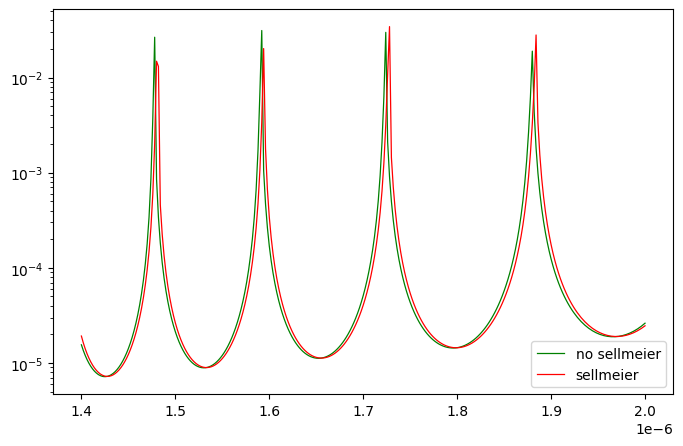

In [36]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9, label='no sellmeier')
plt.plot(wls, -betas2.imag, color='red', linewidth=.9, label='sellmeier')
plt.yscale('log')
plt.legend()
# for l in ls_sell:
#     plt.plot([l,l], [0, .0001],  linewidth=1, color='r',linestyle=':')
# for l in ls:
#     plt.plot([l,l], [0, .0001],  linewidth=1, color='g',linestyle=':')
